# Wstęp do Sztucznej Inteligencji - rok akademicki 2020/2021

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat: Sztuczne Sieci Neuronowe - Lab 2 - Zadania (obowiązkowe)

## Wielowarstwowe sieci jednokierunkowe
Cechą charakterystyczną sieci jednokierunkowych wielowarstwowych jest występowanie, co najmniej jednej warstwy ukrytej neuronów, która pośredniczy w przekazywaniu sygnałów między węzłami w warstwie wejściowej, a warstwą wyjściową.

### Architektura
![MLPnet.gif](http://torus.uck.pk.edu.pl/~amarsz/images/MLPnet.gif)
- Sygnały wejściowe podawane są na pierwszą warstwę ukrytą neuronów, a te z kolei stanowią sygnały źródłowe dla kolejnej warstwy itd. aż do warstwy wyjściowej.
- W sieci tej występują zazwyczaj pełne połączenia między warstwami tzn. każdy neuron następnej warstwy jest połączony z każdym neuronem warstwy poprzedniej. 
- Neurony warstw ukrytych stanowią bardzo istotny element sieci, umożliwiający uwzględnienie związków między sygnałami, wynikającymi z zależności statystycznych wyższego rzędu.

### Uczenie
Uczenie sieci MLP odbywa się zwykle z nauczycielem, a najpopularniejszą metodą uczenia jest algorytm wstecznej propagacji błędu. Algorytm wstecznej propagacji - BackPropagation (BP) określa strategię doboru wag w sieci wielowarstwowej przy wykorzystaniu gradientowych metod optymalizacji. Podczas procesu uczenia sieci dokonuje się prezentacji pewnej ilości zestawów uczących (tzn. wektorów wejściowych oraz odpowiadających im wektorów sygnałów wzorcowych (wyjściowych)). Uczenie polega na takim doborze wag neuronów by w efekcie końcowy błąd popełniany przez sieć był mniejszy od zadanego.

## Ciągłe funkcje aktywacji. Neurony sigmoidalne.
Wykorzystując do uczenia algorytm wstecznej propagacji błędu należy obliczyć pochodne cząstkowe względem wag, co zmusza nas do stosowanie ciągłych (różniczkowalnych) funkcji aktywacji. Najczęściej stosowane są wówczas _neurony sigmoidalne_, których budowa jest prawie taka sama jak perceptronu z tą różnicą, że zamiast progowej funkcji aktywacji wykorzystuje sie ciągłe funkcje sigmoidalne (unipolarną lub bipolarną).

Funkcje sigmoidalne odpowiednio unipolarna i bipolarna:

![sigmoidalne.png](http://torus.uck.pk.edu.pl/~amarsz/images/sigmoidalne.png)

Parametr $\beta$ pozwala na modyfikację nachylenia funkcji sigmoidalnych.

Popularność tych funkcji spowodowana jest łatwością obliczania ich pochodnych, co jest konieczne przy użyciu algorytmów uczenia opartych na podejściu gradientowym. Wartości pochodnych dla powyższych funkcji łatwo obliczyć znając jedynie wartości samych funkcji.
$$f'_1(x)=\frac{\beta e^{-\beta x}}{\left(1-e^{-\beta x}\right)^2}=\beta f_1(x)\left(1-f_1(x)\right)$$

$$f'_2(x)=\beta-\beta\left(\frac{\left(e^{\beta x}-e^{-\beta x}\right)^2}{\left(e^{\beta x}+e^{-\beta x}\right)^2}\right)=\beta \left(1-f_2(x)^2\right)$$


## Algorytm wstecznej propagacji błędu
Dla uproszczenia rozważymy przypadek sieci z jedną warstwą ukrytą, której schemat wraz z oznaczeniami przedstawia poniższy rysunek.
![mlp1h.png](http://torus.uck.pk.edu.pl/~amarsz/images/mlp1h.png)

- Wektor sygnałów wejściowych $x=[1, x_1, x_2, \ldots, x_N]$.
- Macierz $W^{(1)}$ o rozmiarach $K\times(N+1)$ zawiera wartości wag między sygnałami wejściowymi a warstwą ukrytą, gdzie $w^{(1)}_{kn}$ oznacza wagę pomiędzy $k$-tym neuronem warstwy ukrytej a $n$-tym sygnałem wejściowym.
- Macierz $W^{(2)}$ o rozmiarach $M\times(K+1)$ zawiera wartości wag między warstwą ukrytą a warstwą wyjąciową, gdzie $w^{(2)}_{mk}$ oznacza wagę pomiędzy $m$-tym neuronem warstwy wyjściowej a $k$-tym neuronem warstwy ukrytej.
- Wektor pożądanych odpowiedzi $x=[d_1, d_2, \ldots, d_M]$.

Wówczas błąd dla jednego przykładu uczącego wyraża się wzorem:

$$E(W) = \frac{1}{2}\sum\limits_{m=1}^M\left[y_m - d_m\right]^2$$

przy czym $y_m$ wyraża się wzorem:

$$ y_m = G\left(\sum\limits_{k=0}^K w_{mk}^{(2)}\cdot v_k\right) = G\left(\sum\limits_{k=0}^K w_{mk}^{(2)}\cdot F\left(\sum\limits_{n=0}^N{w^{(1)}_{kn}\cdot x_n}\right)\right)$$

gdzie funkcje $F$ i $G$ to funkcje aktywacji odpowiednio w warstwie ukrytej i wyjściowej.

### Aktualizacja wag warstwy wyjściowej $W^{(2)}$
Poprawa wag odbywa się w kierunku przeciwnym do gradienu (wektora pochodnych), $\eta$ - współczynnik uczenia:

$$ w^{(2)}_{mk} = w^{(2)}_{mk} - \eta\cdot\frac{\partial E(W)}{\partial w^{(2)}_{mk}} $$

gdzie 

$$ \frac{\partial E(W)}{\partial w^{(2)}_{mk}} = (y_m - d_m)\cdot G'\left(\sum\limits_{k=0}^K w_{mk}^{(2)}\cdot v_k\right)\cdot v_k $$

### Aktualizacja wag warstwy ukrytej $W^{(1)}$
Poprawa wag odbywa według tej samej zasady co poprzednio, $\eta$ - współczynnik uczenia:

$$ w^{(1)}_{kn} = w^{(1)}_{kn} - \eta\cdot\frac{\partial E(W)}{\partial w^{(1)}_{kn}} $$

gdzie 

$$ \frac{\partial E(W)}{\partial w^{(1)}_{kn}} = \sum\limits_{m=1}^M\left[(y_m - d_m)\cdot G'\left(\sum\limits_{k=0}^K w_{mk}^{(2)}\cdot v_k\right)\cdot w^{(2)}_{mk}\cdot F'\left(\sum\limits_{n=0}^N{w^{(1)}_{kn}\cdot x_n}\right)\cdot x_n\right]$$

## Problem XOR
Poniższy rysunek (po lewej) ilustruje spójnik logiczny XOR. Aby zrealizować spójnik XOR za pomocą sieci neuronowej, wewnątrz zakreślonego obszaru sieć powinna odpowiadać sygnałem równym 1, natomiast na zewnątrz sygnałem równym 0. 
![xor.png](http://torus.uck.pk.edu.pl/~amarsz/images/xor.png)

Takiego warunku nie można spełnić stosując podział obszaru przy użyciu jednej prostej (jednego neuronu) niezależnie od wartości współczynników tej prostej. Problem XOR nie należy zatem do klasy problemów liniowo separowalnych i nie da się go rozwiązać za pomocą sieci jednowarstwowej.

Problem XOR w łatwy sposób daje się rozwiązać oddzielając klasy od siebie za pomocą dwóch prostych. Każda z tych prostych reprezentuje jeden neuron, którego wagi dobieramy tak, aby realizowały podział przestrzeni tak jak na rysunku powyżej (po prawej). Dokładając trzeci neuron, którego wejściami są wyjścia poprzednich neuronów otrzymujemy odpowiedź czy znajdujemy się wewnątrz czy na zewnątrz zaznaczonego obszaru.

Przykładowy przebieg uczenia sieci klasyfikującej dane typu XOR. 
![xor_mlp.gif](http://torus.uck.pk.edu.pl/~amarsz/images/xor_mlp.gif)

## Zadanie 1 (4 pkt., obowiązkowe)
- Zaimplementuj (w postaci funkcji) sieć neuronową o architekturze przedstawionej na poniższym rysunku.
![zad1.png](http://torus.uck.pk.edu.pl/~amarsz/images/zad1.png)
- Dla neuronów warstwy ukrytej jako funkcję aktywacji przyjmij bipolarną funkcję sigmoidalną.
- Dla neuronu warstwy wyjściowej jako funkcję aktywacji przyjmij unipolarną funkcję sigmoidalną.
- Implementację wykonaj na reprezentacji wektorowo-macierzowej.
- Funkcja powinna zwracać odpowiedź sieci oraz wszystkie składniki potrzebne do policzenia pochodnych (patrz zadanie 2).

In [41]:
import numpy as np

def sigmoid(x, beta):#unipolarna
    return 1/(1+np.exp(-beta*x))

def tanh(x, beta):#bipolarna
    return np.tanh(beta*x)

# x - sygnał wejściowy [1,x1,x2,...,xN]
# w1 - wagi warstwy ukrytej, macierz
# w2 - wagi warstwy wyjściowej, wektor
# beta - parametr funkcji aktywacji, mogą być dwa różne

def mlp(x, w1, w2, beta):
  
    sol_1 = np.dot(w1, x)
    y = np.zeros(len(sol_1) + 1)
    y[0] = 1
    for i in range(1, (sol_1.shape[0] + 1)):
        y[i] = tanh(beta, sol_1[i - 1])
        
    sol_2 = np.dot(w2, y)
    res = sigmoid(beta, sol_2)
    return res, y

## Zadanie 2 (6 pkt., obowiązkowe)
- Zaimplementuj algorytm wstecznej propagacji błędu dla sieci z zadania 1 w dwóch wariantach:
  - aktualizacja wag następuje po każdej próbce uczącej,
  - aktualizacja wag następuje po każdej epoce (po wszystkich próbkach uczących). 
- Stwórz wykres przedstawiające zmiany wartości błędu sieci podczas uczenia (epoka, błąd) rozwiązywania problemu XOR (dane w komórce poniżej).
- Oba modele ucz aż błąd klasyfikacji będzie równy 0 (ale nie dłużej niż 100000 epok) przy następującym założeniu
  - jeśli odpowiedź sieci jest większa od 0.9 to uznajemy że próbka jest z klasy 1,
  - jeśli odpowiedź sieci jest mniejsza od 0.1 to uznajemy że próbka jest z klasy 0,
  - w pozostałych przypadkach uznajemy że sieć nie daje jednoznacznej odpowiedzi.
- Wskazówka a zarazem pytanie: Aby zbyt często nie utykać w minimach lokalnych, warto zamienić zerowe sygnały wejściowe na wartości niezerowe np. podane niżej dane uczące `xx` warto zamienić na `xx = np.array([[1,-1,-1],[1,-1,1],[1,1,-1],[1,1,1]])`. Dlaczego?

Epoka: 0 	Błąd klasyfikacji: 4
Epoka: 5000 	Błąd klasyfikacji: 4
Koniec nauczania - Epoka: 8127 	Błąd klasyfikacji: 0
Epoka: 0 	Błąd klasyfikacji: 4
Epoka: 5000 	Błąd klasyfikacji: 4
Koniec nauczania - Epoka: 8454 	Błąd klasyfikacji: 0

1 Metoda
Wynik ostateczny:
Wagi dla warstwy ukrytej:
[[-2.22351614 -4.82632112  4.78259939]
 [-2.87072326  5.69970191 -5.63711685]]
Wagi dla warstwy jawnej:
[7.19012092 8.41225806 8.20152152]

2 Metoda
Wynik ostateczny:
Wagi dla warstwy ukrytej:
[[-2.32394816 -5.0542501   4.83968816]
 [-2.91153997  5.72674206 -5.7844947 ]]
Wagi dla warstwy jawnej:
[7.36342017 8.73073536 8.55887715]


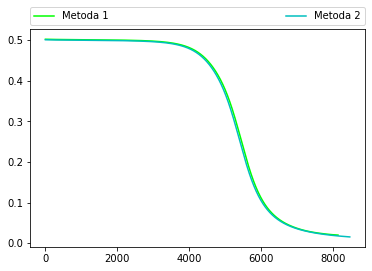

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xx = np.array([ [1,0,0], [1,0,1], [1,1,0], [1,1,1] ])
d = np.array([0, 1, 1, 0])

def sigmoid_diff(beta, y):
    return beta * y * (1 - y)

def tanh_diff(beta, y):
    return beta * (1 - y*y)


#model to make accurate predictions
def train_sample(xx, d, eta, beta):
    iteration = 0

    #computing error rate
    error = []
    while True:

        errorclass = 0
        propagat_error = 0
        x = np.zeros(xx.shape[0])
        for i in range(len(xx)):
            y, x = mlp(xx[i], w1, w2, beta)
            propagat_error += 1 / 2 * ((y - d[i])**2)
            
            if (y >= 0.1 and y <= 0.9) or (y > 0.9 and d[i] == 0) or (y < 0.1 and d[i] == 1):
                errorclass += 1
                   
                for j in range(2):
                    correction_w1 = (y - d[i]) * sigmoid_diff(beta, y) * w2[j + 1] * tanh_diff(beta, x[j + 1]) * xx[i]
                    w1[j, :] -= eta * correction_w1[:]

                    correction_w2 = (y - d[i]) * sigmoid_diff(beta, y) * x
                    w2[:] -= eta * correction_w2
                

        error.append(propagat_error)
        if iteration % 5000 == 0:
            print("Epoka:", iteration, "\tBłąd klasyfikacji:", errorclass)
        

        
        if errorclass == 0 or iteration == 100000:
            print("Koniec nauczania - Epoka:", iteration, "\tBłąd klasyfikacji:", errorclass)
            return w1, w2, error
            
        iteration += 1




def train_epoach(xx, d, eta, beta):
    iteration = 0
    #computing error rate
    error = []
    #model to make accurate predictions
    while True:

        errorclass = 0
        propagat_error = 0
        y = [0] * xx.shape[0]
        x = np.zeros((xx.shape[0], 3))
        for i in range(len(xx)):
            y[i], x[i] = mlp(xx[i], w1, w2, beta)
            propagat_error += (1 / 2 * ((y[i] - d[i])**2))
            if (y[i] >= 0.1 and y[i] <= 0.9) or (y[i] > 0.9 and d[i] == 0) or (y[i] < 0.1 and d[i] == 1):
                errorclass += 1
                


        error.append(propagat_error)
        if iteration % 5000 == 0:
            print("Epoka:", iteration, "\tBłąd klasyfikacji:", errorclass)
        


        if errorclass == 0 or iteration == 100000:
            print("Koniec nauczania - Epoka:", iteration, "\tBłąd klasyfikacji:", errorclass)
            return w1, w2, error
        
        for j in range(2):
            for i in range(len(xx)):
                correction_w1 = (y[i] - d[i]) * sigmoid_diff(beta, y[i]) * w2[j+1] * tanh_diff(beta, x[i][j+1]) * xx[i]
                w1[j, :] -= eta * correction_w1[:]
                correction_w2 = (y[i] - d[i]) * sigmoid_diff(beta, y[i]) * x[i]
                w2[:] -= eta * correction_w2
            
        iteration += 1
            
    
w1 = np.random.random((2, 3)) * 2 - 1.0
w2 = np.random.random(3) * 2 - 1.0
temp_w_1 = np.array(w1)
temp_w_2 = np.array(w2)

r1, r2, i = train_sample(xx, d, 0.1, 0.4)

w1 = temp_w_1
w2 = temp_w_2
r3, r4, i1 = train_epoach(xx, d, 0.1, 0.4)
print("\n1 Metoda\nWynik ostateczny:\nWagi dla warstwy ukrytej:\n", r1,"\nWagi dla warstwy jawnej:\n", r2, sep="")
x = np.arange(len(i))
y = np.array(i)

print("\n2 Metoda\nWynik ostateczny:\nWagi dla warstwy ukrytej:\n", r3, "\nWagi dla warstwy jawnej:\n", r4, sep="")
x1 = np.arange(len(i1))
y1 = np.array(i1)
plt.plot(x, y, label="Metoda 1", color="lime")
plt.plot(x1, y1, label="Metoda 2", color="c")
plt.legend(bbox_to_anchor = (0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

&copy; Katedra Informatyki, Politechnika Krakowska